In [79]:
import pandas as pd


In [80]:
heart_data = pd.read_csv('heart_disease_uci.csv')

In [81]:
heart_data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [82]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [83]:
# 1. Shape of the Data
print("Shape of the DataFrame:", heart_data.shape)

# 2. Data Types
print("\nData Types of Features:\n", heart_data.dtypes)

# 3. Target Variable Distribution
print("\nDistribution of Target Variable ('num'):\n", heart_data['num'].value_counts())

# 4. Descriptive Statistics for Numerical Features
numerical_features = heart_data.select_dtypes(include=['number'])
print("\nDescriptive Statistics for Numerical Features:\n", numerical_features.describe())

Shape of the DataFrame: (920, 16)

Data Types of Features:
 id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

Distribution of Target Variable ('num'):
 num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

Descriptive Statistics for Numerical Features:
                id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120

In [84]:
import pandas as pd

# Check for missing values
missing_values = heart_data.isnull().sum()
print("Missing values per column:\n", missing_values)

# Handle missing values (if any)
# Example: Imputing missing values with the mean for numerical features
for column in heart_data.columns:
    if heart_data[column].isnull().any():
        if pd.api.types.is_numeric_dtype(heart_data[column]):
            heart_data.loc[:, column] = heart_data[column].fillna(heart_data[column].mean())
        else:
            heart_data.loc[:, column] = heart_data[column].fillna(heart_data[column].mode()[0])

# Verify if missing values are handled
missing_values_after_handling = heart_data.isnull().sum()
print("\nMissing values after handling:\n", missing_values_after_handling)


Missing values per column:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

Missing values after handling:
 id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


C:\Users\TEST\AppData\Local\Temp\ipykernel_18012\3483941371.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heart_data.loc[:, column] = heart_data[column].fillna(heart_data[column].mode()[0])


In [96]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create a copy of the DataFrame to avoid modifying the original
df_encoded_scaled = heart_data.copy()

# Identify categorical features
categorical_features = ['sex', 'cp', 'restecg', 'slope', 'thal']

# Apply one-hot encoding to categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(df_encoded_scaled[categorical_features])
feature_names = encoder.get_feature_names_out(categorical_features)
encoded_df = pd.DataFrame(encoded_features, columns=feature_names)

# Drop the original categorical columns and concatenate the encoded ones
df_encoded_scaled = df_encoded_scaled.drop(categorical_features, axis=1)
df_encoded_scaled = pd.concat([df_encoded_scaled, encoded_df], axis=1)


# Identify numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

# Scale numerical features
scaler = StandardScaler()
df_encoded_scaled[numerical_features] = scaler.fit_transform(df_encoded_scaled[numerical_features])


df_encoded_scaled.head()

,id,age,dataset,trestbps,chol,fbs,thalch,exang,oldpeak,ca,...,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,1,1.007386,Cleveland,0.698041,0.311021,True,0.495698,False,1.349421,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2,1.432034,Cleveland,1.511761,0.797713,False,-1.175955,True,0.589832,3.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3,1.432034,Cleveland,-0.658158,0.274289,False,-0.340128,True,1.634267,2.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,4,-1.752828,Cleveland,-0.115679,0.467130,False,1.968345,False,2.488805,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,5,-1.328180,Cleveland,-0.115679,0.044717,False,1.371326,False,0.494884,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


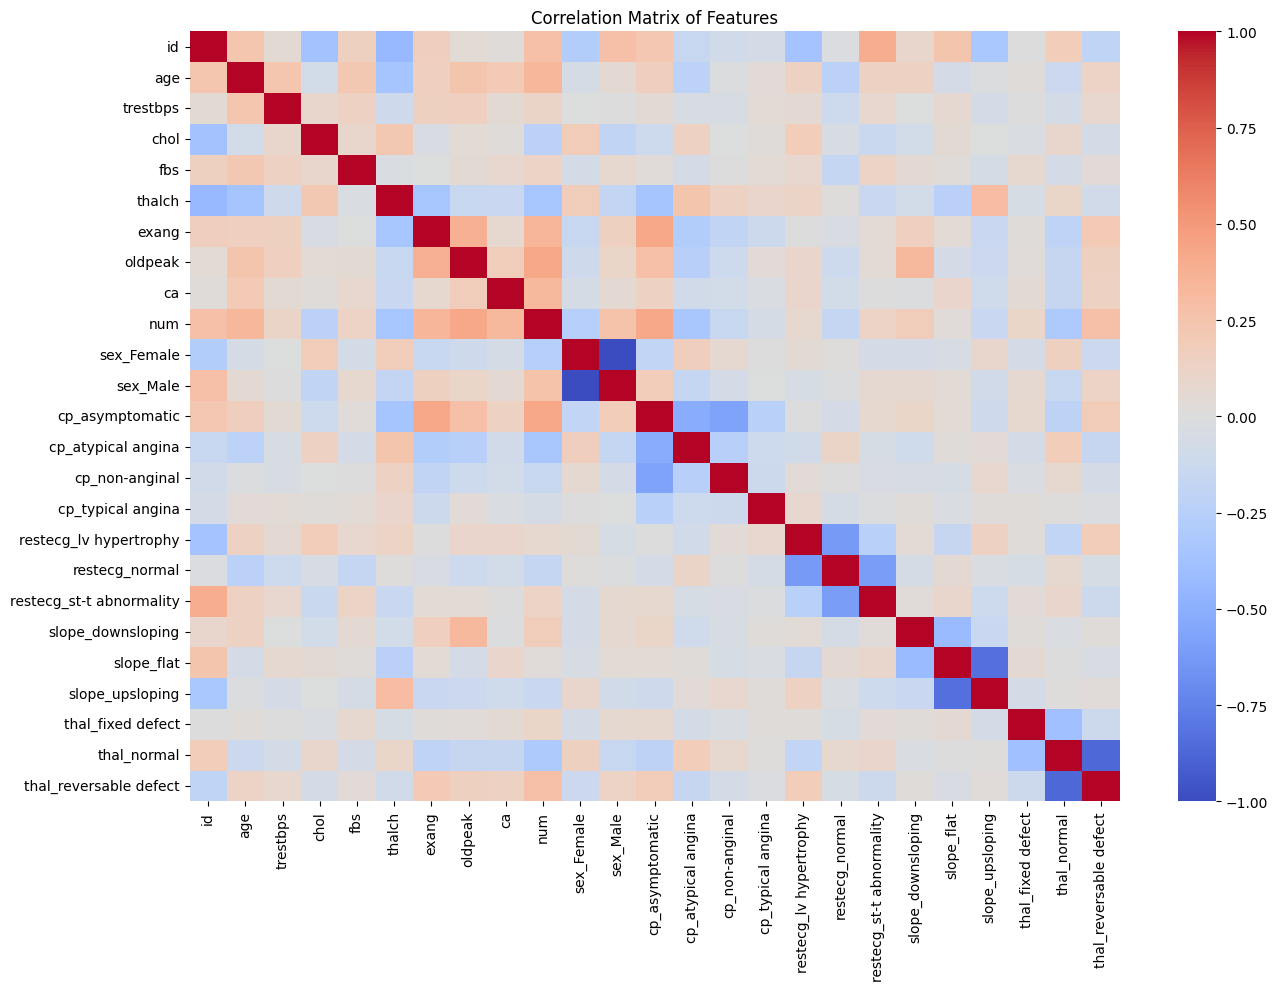

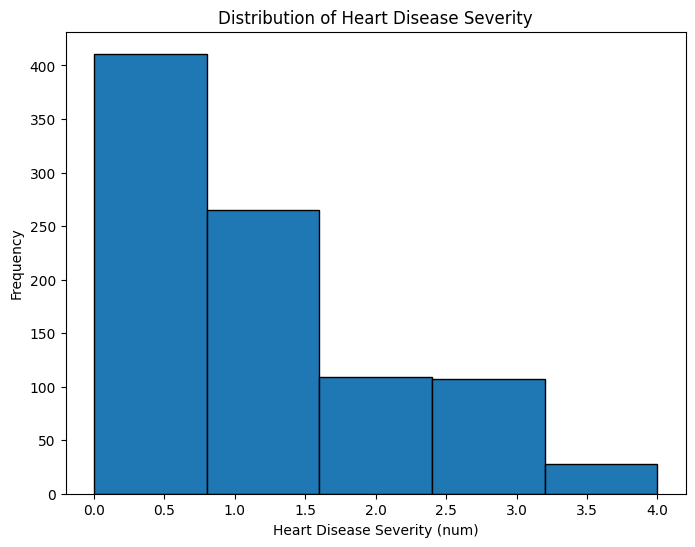

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove the 'dataset' column before calculating the correlation matrix
df_encoded_scaled_no_dataset = df_encoded_scaled.drop('dataset', axis=1)

# Correlation Heatmap
plt.figure(figsize=(15, 10))
correlation_matrix = df_encoded_scaled_no_dataset.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# Histogram of Target Variable
plt.figure(figsize=(8, 6))
plt.hist(df_encoded_scaled_no_dataset['num'], bins=5, edgecolor='black')
plt.title('Distribution of Heart Disease Severity')
plt.xlabel('Heart Disease Severity (num)')
plt.ylabel('Frequency')
plt.show()

In [87]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df_encoded_scaled.drop('num', axis=1)
y = df_encoded_scaled['num']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler

# Scale the data to improve convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate models with modified hyperparameters
logreg_model = LogisticRegression(max_iter=500, solver='lbfgs')  # Increased iterations
decision_tree_model = DecisionTreeClassifier()
random_forest_model = RandomForestClassifier()
adaboost_model = AdaBoostClassifier(algorithm='SAMME')  # Explicitly use SAMME to avoid deprecation

# Train models using scaled data
logreg_model.fit(X_train_scaled, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
adaboost_model.fit(X_train, y_train)


AdaBoostClassifier(algorithm='SAMME')

In [92]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Ensure X_test remains in the same format as X_train
X_test_consistent = X_test.copy()  # Keep X_test as a DataFrame

# Evaluate models on the test set
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost']
models = [logreg_model, decision_tree_model, random_forest_model, adaboost_model]
evaluation_results = {}

for model_name, model in zip(model_names, models):
    y_pred = model.predict(X_test_consistent)  # Use the consistent format

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    evaluation_results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

# Print the evaluation results
for model_name, metrics in evaluation_results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print("-" * 20)


Model: Logistic Regression
Accuracy: 0.2935
Precision: 0.7927
Recall: 0.2935
F1-Score: 0.1332
--------------------
Model: Decision Tree
Accuracy: 0.5489
Precision: 0.5274
Recall: 0.5489
F1-Score: 0.5309
--------------------
Model: Random Forest
Accuracy: 0.6250
Precision: 0.5904
Recall: 0.6250
F1-Score: 0.5994
--------------------
Model: AdaBoost
Accuracy: 0.5924
Precision: 0.5521
Recall: 0.5924
F1-Score: 0.5654
--------------------


c:\Users\TEST\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [93]:
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Scale the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Update Logistic Regression with higher iterations and solver
logreg_model = LogisticRegression(max_iter=1000, solver='lbfgs')

# Re-train models
logreg_model.fit(X_train_scaled, y_train)
random_forest_model.fit(X_train_scaled, y_train)
adaboost_model.fit(X_train_scaled, y_train)

# Create Voting Classifier
voting_model = VotingClassifier(estimators=[
    ('logistic_regression', logreg_model),
    ('random_forest', random_forest_model),
    ('adaboost', adaboost_model)],
    voting='hard')

# Train Voting Classifier on the scaled data
voting_model.fit(X_train_scaled, y_train)

# Evaluate the Voting Classifier
y_pred_voting = voting_model.predict(X_test_scaled)

accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting, average='weighted', zero_division=1)
recall_voting = recall_score(y_test, y_pred_voting, average='weighted')
f1_voting = f1_score(y_test, y_pred_voting, average='weighted')

print("Voting Classifier Results:")
print(f"Accuracy: {accuracy_voting:.4f}")
print(f"Precision: {precision_voting:.4f}")
print(f"Recall: {recall_voting:.4f}")
print(f"F1-Score: {f1_voting:.4f}")


Voting Classifier Results:
Accuracy: 0.5978
Precision: 0.5574
Recall: 0.5978
F1-Score: 0.5494


In [94]:
import joblib

# Ensure models are stored in a dictionary
models_dict = {
    "Logistic Regression": logreg_model,
    "Decision Tree": decision_tree_model,
    "Random Forest": random_forest_model,
    "AdaBoost": adaboost_model,
    "Voting Classifier": voting_model
}

# Determine the best model based on Accuracy
best_model_name = max(evaluation_results, key=lambda x: evaluation_results[x]['Accuracy'])
best_model = models_dict.get(best_model_name, voting_model)  # Default to Voting Classifier if not found

print(f"\n🏆 Best Model: {best_model_name} with Accuracy: {evaluation_results[best_model_name]['Accuracy']:.4f}\n")

# Save the best-performing model
joblib.dump(best_model, "best_model.pkl")



🏆 Best Model: Random Forest with Accuracy: 0.6250



['best_model.pkl']